# Notebook Setup

This line is required to display the plots in the notebook

In [1]:
%matplotlib inline

# Plot setup
This line disables autoscroll so that all the plots can be seen

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Definitions and Functions

Imports the libraries and defines the functions we will be using.

In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
import pandas as pd
plt.style.use('ggplot')
from scipy.interpolate import interp1d
import struct
import datetime

# Load the data

In [4]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('sorted_test.csv')

In [5]:
pd.options.display.max_columns = 999
df_train.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,m7422.75,m7420.82,m7418.9,m7416.97,m7415.04,m7413.11,m7411.18,m7409.25,m7407.33,m7405.4,m7403.47,m7401.54,m7399.61,m7397.68,m7395.75,m7393.83,m7391.9,m7389.97,m7388.04,m7386.11,m7384.18,m7382.25,m7380.33,m7378.4,m7376.47,m7374.54,m7372.61,m7370.68,m7368.76,m7366.83,m7364.9,m7362.97,m7361.04,m7359.11,m7357.18,m7355.26,m7353.33,m7351.4,m7349.47,m7347.54,m7345.61,m7343.68,m7341.76,m7339.83,m7337.9,m7335.97,m7334.04,m7332.11,m7330.19,m7328.26,m7326.33,m7324.4,m7322.47,m7320.54,m7318.61,m7316.69,m7314.76,m7312.83,m7310.9,m7308.97,m7307.04,m7305.12,m7303.19,m7301.26,m7299.33,m7297.4,m7295.47,m7293.54,m7291.62,m7289.69,m7287.76,m7285.83,m7283.9,m7281.97,m7280.04,m7278.12,m7276.19,m7274.26,m7272.33,m7270.4,m7268.47,m7266.55,m7264.62,m7262.69,m7260.76,m7258.83,m7256.9,m7254.97,m7253.05,m7251.12,m7249.19,m7247.26,m7245.33,m7243.4,m7241.48,m7239.55,m7237.62,m7235.69,m7233.76,m7231.83,m7229.9,m7227.98,m7226.05,m7224.12,m7222.19,m7220.26,m7218.33,m7216.4,m7214.48,m7212.55,m7210.62,m7208.69,m7206.76,m7204.83,m7202.91,m7200.98,m7199.05,m7197.12,m7195.19,m7193.26,m7191.33,m7189.41,m7187.48,m7185.55,m7183.62,m7181.69,m7179.76,m7177.83,m7175.91,m7173.98,m7172.05,m7170.12,m7168.19,m7166.26,m7164.34,m7162.41,m7160.48,m7158.55,m7156.62,m7154.69,m7152.76,m7150.84,m7148.91,m7146.98,m7145.05,m7143.12,m7141.19,m7139.27,m7137.34,m7135.41,m7133.48,m7131.55,m7129.62,m7127.69,m7125.77,m7123.84,m7121.91,m7119.98,m7118.05,m7116.12,m7114.19,m7112.27,m7110.34,m7108.41,m7106.48,m7104.55,m7102.62,m7100.7,m7098.77,m7096.84,m7094.91,m7092.98,m7091.05,m7089.12,m7087.2,m7085.27,m7083.34,m7081.41,m7079.48,m7077.55,m7075.62,m7073.7,m7071.77,m7069.84,m7067.91,m7065.98,m7064.05,m7062.13,m7060.2,m7058.27,m7056.34,m7054.41,m7052.48,m7050.55,m7048.63,m7046.7,m7044.77,m7042.84,m7040.91,m7038.98,m7037.06,m7035.13,m7033.2,m7031.27,m7029.34,m7027.41,m7025.48,m7023.56,m7021.63,m7019.7,m7017.77,m7015.84,m7013.91,m7011.98,m7010.06,m7008.13,m7006.2,m7004.27,m7002.34,m7000.41,m6998.49,m6996.56,m6994.63,m6992.7,m6990.77,m6988.84,m6986.91,m6984.99,m6983.06,m6981.13,m6979.2,m6977.27,m6975.34,m6973.42,m6971.49,m6969.56,m6967.63,m6965.7,m6963.77,m6961.84,m6959.92,m6957.99,m6956.06,m6954.13,m6952.2,m6950.27,m6948.34,m6946.42,m6944.49,m6942.56,m6940.63,m6938.7,m6936.77,m6934.85,m6932.92,m6930.99,m6929.06,m6927.13,m6925.2,m6923.27,m6921.35,m6919.42,m6917.49,m6915.56,m6913.63,m6911.7,m6909.77,m6907.85,m6905.92,m6903.99,m6902.06,m6900.13,m6898.2,m6896.28,m6894.35,m6892.42,m6890.49,m6888.56,m6886.63,m6884.7,m6882.78,m6880.85,m6878.92,m6876.99,m6875.06,m6873.13,m6871.21,m6869.28,m6867.35,m6865.42,m6863.49,m6861.56,m6859.63,m6857.71,m6855.78,m6853.85,m6851.92,m6849.99,m6848.06,m6846.13,m6844.21,m6842.28,m6840.35,m6838.42,m6836.49,m6834.56,m6832.64,m6830.71,m6828.78,m6826.85,m6824.92,m6822.99,m6821.06,m6819.14,m6817.21,m6815.28,m6813.35,m6811.42,m6809.49,m6807.57,m6805.64,m6803.71,m6801.78,m6799.85,m6797.92,m6795.99,m6794.07,m6792.14,m6790.21,m6788.28,m6786.35,m6784.42,m6782.49,m6780.57,m6778.64,m6776.71,m6774.78,m6772.85,m6770.92,m6769,m6767.07,m6765.14,m6763.21,m6761.28,m6759.35,m6757.42,m6755.5,m6753.57,m6751.64,m6749.71,m6747.78,m6745.85,m6743.92,m6742,m6740.07,m6738.14,m6736.21,m6734.28,m6732.35,m6730.43,m6728.5,m6726.57,m6724.64,m6722.71,m6720.78,m6718.85,m6716.93,m6715,m6713.07,m6711.14,m6709.21,m6707.28,m6705.36,m6703.43,m6701.5,m6699.57,m6697.64,m6695.71,m6693.78,m6691.86,m6689.93,m6688,m6686.07,m6684.14,m6682.21,m6680.28,m6678.36,m6676.43,m6674.5,m6672.57,m6670.64,m6668.71,m6666.79,m6664.86,m6662.93,m6661,m6659.07,m6657.14,m6655.21,m6653.29,m6651.36,m6649.43,m6647.5,m6645.57,m6643.64,m6641.72,m6639.79,m6637.86,m6635.93,m6634,m6632.07,m

In [6]:
df_train.shape

(1157, 3600)

In [7]:
df_test.shape

(727, 3595)

# Data Exploration


Select the columns

In [8]:
lst_spectrum = [col for col in df_train.columns if 'm' in col]

Create the x-axis labels

In [9]:
import re
lst_float = [float(re.sub('m', '', str_list)) for str_list in lst_spectrum]
d_wavelength = np.array(lst_float)
d_spectrum = np.array(df_train.loc[2,lst_spectrum])

In [10]:
print("Number of spectral samples: {0:0.0f}".format(len(d_spectrum)))

Number of spectral samples: 3578


Plot the data

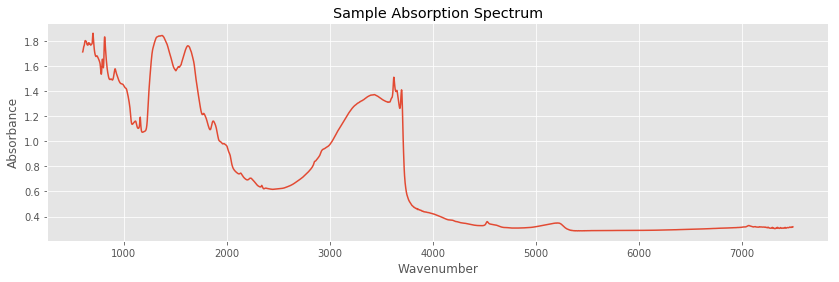

In [11]:
plt.figure(figsize=(14,4))
plt.plot(d_wavelength, d_spectrum)
plt.xlabel('Wavenumber')
plt.ylabel('Absorbance')
plt.title('Sample Absorption Spectrum')
plt.savefig('Spectrum.png')

Check out https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html#arrays-dtypes-constructing for more details on types

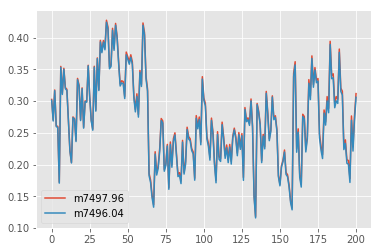

In [12]:
lst_test = ['m7497.96','m7496.04']
df_train.loc[0:200,lst_test].plot()

In [13]:
# Separating out the features
x = df_train.loc[:, lst_spectrum].values

In [14]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

In [16]:
lst_train_x = ['principal component 1', 'principal component 2', 'principal component 3', 
                   'principal component 4', 'principal component 5']
lst_train_y = ['Sand']
df_principal = pd.DataFrame(data = principalComponents, 
                           columns = lst_train_x)

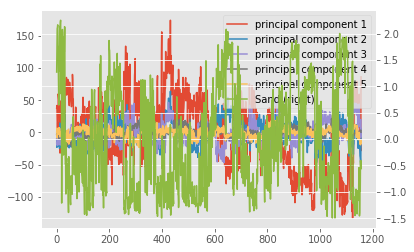

In [17]:
df_final = pd.concat([df_principal, df_train[lst_train_y]], axis = 1)
df_final.plot(secondary_y=lst_train_y)

# Build the model for sand

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
df_principal.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,37.566682,-10.308038,-16.646500,-3.286982,0.522486
1,41.779876,-23.138383,-19.652000,-7.228885,6.760043
2,14.164969,2.033603,-6.123725,-2.306763,-8.708443
3,-1.857874,-2.068697,-6.627596,-3.708792,-3.853554
4,15.181218,-3.248237,-19.421317,1.060678,-0.109088


In [20]:
lm.fit(df_final[lst_train_x].values, df_final[lst_train_y].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
df_final['pred'] = lm.predict(df_final[lst_train_x].values)

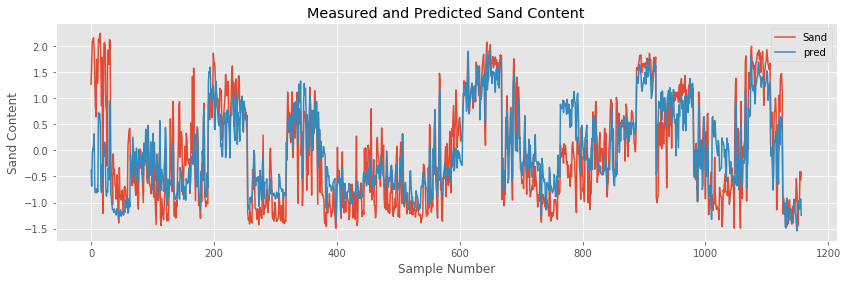

In [22]:
ax = df_final[['Sand','pred']].plot(figsize=(14,4))
ax.set_xlabel('Sample Number')
ax.set_ylabel('Sand Content')
ax.set_title('Measured and Predicted Sand Content')
fig = ax.get_figure()
fig.savefig('Sand.png')

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
print("MSE: {0:0.2f}".format(mean_squared_error(df_final[lst_train_y].values, df_final['pred'].values)))
print("R^2: {0:0.2f}".format(r2_score(df_final[lst_train_y].values, df_final['pred'].values)))

MSE: 0.35
R^2: 0.64


# Calcium search

In [25]:
lst_train_y = ['Ca']

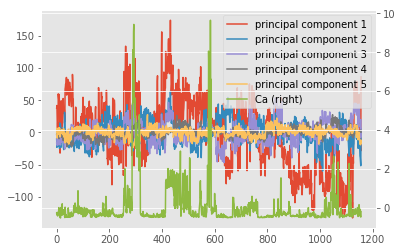

In [26]:
df_final = pd.concat([df_principal, df_train[lst_train_y]], axis = 1)
df_final.plot(secondary_y=lst_train_y)

In [27]:
from sklearn.neural_network import MLPRegressor

In [28]:
mlp = MLPRegressor(hidden_layer_sizes=(200,), alpha=0.0001)

In [29]:
mlp.fit(df_final[lst_train_x].values, df_final[lst_train_y].values.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [30]:
df_final['pred'] = mlp.predict(df_final[lst_train_x].values)

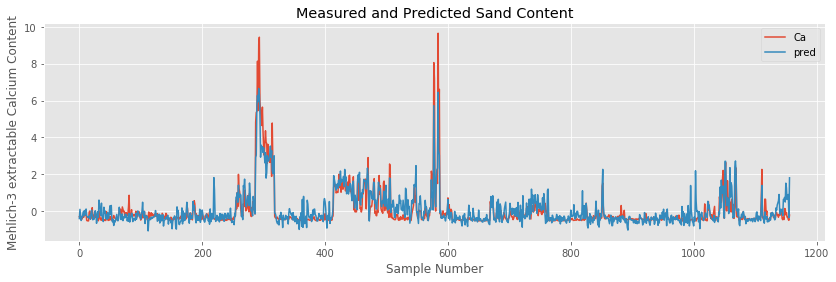

In [31]:
ax = df_final[['Ca','pred']].plot(figsize=(14,4))
ax.set_xlabel('Sample Number')
ax.set_ylabel('Mehlich-3 extractable Calcium Content')
ax.set_title('Measured and Predicted Sand Content')
fig = ax.get_figure()
fig.savefig('Ca.png')

In [32]:
print("MSE: {0:0.2f}".format(mean_squared_error(df_final[lst_train_y].values, df_final['pred'].values)))
print("R^2: {0:0.2f}".format(r2_score(df_final[lst_train_y].values, df_final['pred'].values)))

MSE: 0.26
R^2: 0.77
